In [9]:
"""Simple plotting script for the paper."""

import matplotlib.pyplot as plt

# Define sparsity levels
sparsity_levels = [90, 95, 99, 99.5, 99.9]

# Model names to include
# models = ['Resnet18', 'Resnet18+PP', 'ZeroFL', 'ZeroFL+PP', 'Power-SWAT']
models = ["Resnet18 + Top-k", "ZeroFL", "SparseFedPP"]

# Model performance data (accuracy)
performance_data = [
    {
        "mean": [46.47, 13.45, 1.544, 0.9727, 0.9727],
        "std": [1.741, 21.45, 1.218, 0.6382, 0.6382],
    },
    {
        "mean": [44.11, 33.67, 10.59, 4.038, 0.8687],
        "std": [0.9326, 3.342, 2.476, 3.434, 0.2148],
    },
    {
        "mean": [54.44, 54.33, 47.62, 42.05, 13.85],
        "std": [1.326, 1.475, 1.672, 1.214, 1.013],
    },
]
# Resnet18 performance as a threshold (using first value as Resnet18 accuracy)
resnet18_threshold = 53.79

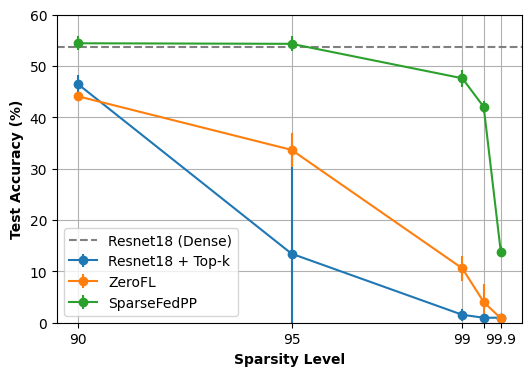

In [10]:
plt.figure(figsize=(6, 4))

# Plot each model's performance at different sparsity levels with error bars
for i, model in enumerate(models):
    mean_values = performance_data[i]["mean"]
    std_values = performance_data[i]["std"]
    plt.errorbar(sparsity_levels, mean_values, yerr=std_values, label=model, marker="o")

# Plot Resnet18 threshold line
plt.axhline(
    y=resnet18_threshold, color="gray", linestyle="--", label="Resnet18 (Dense)"
)

# Set plot properties
# plt.title('Model Performance at Different Sparsity Levels')
plt.xlabel("Sparsity Level", fontweight="bold")  # Make x-axis label bold
plt.ylabel("Test Accuracy (%)", fontweight="bold")  # Make y-axis label bold

# plt.xticks(sparsity_levels)
to_be_removed = 99.5
xticks_labels = [
    str(sparsity) if sparsity != to_be_removed else "" for sparsity in sparsity_levels
]
plt.xticks(sparsity_levels, xticks_labels)

plt.ylim(0, 60)  # Set the y-axis limits

plt.legend()
plt.grid(True)
plt.show()